#Weather Data of Telangana - 2022

In [2]:
import os
os.chdir('/content/drive/MyDrive')   # Changing the directory to where the dataset is located
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#The dataset is in tweleve different csv files.
#Importing the files
df1=pd.read_csv("TS Weather data January 2022.csv")
df2=pd.read_csv("TS Weather data February 2022.csv")
df3=pd.read_csv("TS Weather data March 2022.csv")
df4=pd.read_csv("TS Weather data April 2022..csv")
df5=pd.read_csv("TS Weather data May 2022_0.csv")
df6=pd.read_csv("TS Weather data June 2022_0.csv")
df7=pd.read_csv("TS Weather data July 2022_0.csv")
df8=pd.read_csv("TS Weather data August 2022.csv")
df9=pd.read_csv("TS Weather data September 2022.csv")
df10=pd.read_csv("TS Weather data October 2022.csv")
df11=pd.read_csv("TS Weather data November 2022.csv")
df12=pd.read_csv("TS Weather data December 2022.csv")


In [5]:
# Merging the dataset into one using outer join
df=df1.merge(df2,how='outer')
df=df.merge(df3,how='outer')
df=df.merge(df4,how='outer')
df=df.merge(df5,how='outer')
df=df.merge(df6,how='outer')
df=df.merge(df7,how='outer')
df=df.merge(df8,how='outer')
df=df.merge(df9,how='outer')
df=df.merge(df10,how='outer')
df=df.merge(df11,how='outer')
df=df.merge(df12,how='outer')

In [6]:
df

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,Adilabad,Adilabad Rural,01-Jan-22,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,02-Jan-22,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,03-Jan-22,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,04-Jan-22,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,05-Jan-22,0.0,12.5,28.5,41.9,97.7,0.0,9.5
...,...,...,...,...,...,...,...,...,...,...
200281,Yadadri Bhuvanagiri,Yadagirigutta,27-Dec-22,0.0,21.2,27.8,70.9,99.3,0.0,9.0
200282,Yadadri Bhuvanagiri,Yadagirigutta,28-Dec-22,0.0,20.3,32.4,51.2,99.4,0.0,7.1
200283,Yadadri Bhuvanagiri,Yadagirigutta,29-Dec-22,0.0,20.0,33.5,37.9,98.7,0.0,7.7
200284,Yadadri Bhuvanagiri,Yadagirigutta,30-Dec-22,0.0,20.0,33.7,37.3,98.7,0.0,7.1


##Data Cleaning

In [7]:
df.isnull().sum()

District                    0
Mandal                      0
Date                        0
Rain (mm)                   0
Min Temp (°C)               0
Max Temp (°C)               0
Min Humidity (%)            3
Max Humidity (%)            3
Min Wind Speed (Kmph)    1702
Max Wind Speed (Kmph)    1702
dtype: int64

In [8]:
df.isnull().sum().sum()

3410

There are 3410 missing values in the data.

Missing values are imputed with the mean of the mandal in respective columns

In [9]:
df['Min Humidity (%)']=df['Min Humidity (%)'].fillna(df.groupby('Mandal')['Min Humidity (%)'].transform('mean'))
df['Max Humidity (%)']=df['Max Humidity (%)'].fillna(df.groupby('Mandal')['Max Humidity (%)'].transform('mean'))
df['Min Wind Speed (Kmph)']=df['Min Wind Speed (Kmph)'].fillna(df.groupby('Mandal')['Min Wind Speed (Kmph)'].transform('mean'))
df['Max Wind Speed (Kmph)']=df['Max Wind Speed (Kmph)'].fillna(df.groupby('Mandal')['Max Wind Speed (Kmph)'].transform('mean'))

In [11]:
df.isnull().sum()

District                 0
Mandal                   0
Date                     0
Rain (mm)                0
Min Temp (°C)            0
Max Temp (°C)            0
Min Humidity (%)         0
Max Humidity (%)         0
Min Wind Speed (Kmph)    0
Max Wind Speed (Kmph)    0
dtype: int64

Statistical Description of the Data

In [12]:
df.describe()

,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
count,200286.000000,200286.000000,200286.000000,200286.000000,200286.000000,200286.000000,200286.000000
mean,3.795266,21.469536,34.008471,46.916329,90.993357,0.106465,13.259149
std,13.088204,4.926076,4.158489,22.801216,12.664038,0.637472,16.914106
min,0.000000,4.900000,18.900000,-1.000000,-1.000000,0.000000,0.000000
25%,0.000000,18.700000,31.200000,28.200000,85.800000,0.000000,4.800000
50%,0.000000,22.900000,33.400000,45.700000,97.400000,0.000000,8.300000
75%,0.300000,24.700000,37.000000,64.900000,100.000000,0.000000,12.700000
max,391.000000,34.100000,46.000000,99.900000,100.000000,31.300000,68.900000


There are 34 Districts in the data. But actually 33 Districts are there in Telangana

In [13]:
# A mis-spelt district name 'Hanumakkonda'
df['District'].unique()

array(['Adilabad', 'Bhadradri Kothagudem', 'Hanumakkonda', 'Hyderabad',
       'Jagtial', 'Jangaon', 'Jayashankar', 'Jogulamba Gadwal',
       'Kamareddy', 'Karimnagar', 'Khammam', 'Kumuram Bheem',
       'Mahabubabad', 'Mahabubnagar', 'Mancherial', 'Medak',
       'Medchal-Malkajgiri', 'Mulugu', 'Nagarkurnool', 'Nalgonda',
       'Narayanpet', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal',
       'Yadadri Bhuvanagiri', 'Hanumakonda'], dtype=object)

In [14]:
#Replacing 'Hanumakkonda' with 'Hanumakonda'
df['District']=df['District'].str.replace("Hanumakkonda","Hanumakonda")

In [15]:
df['Mandal']=df['Mandal'].str.replace("Hanumakkonda","Hanumakonda")

In [16]:
df['District'].unique()

array(['Adilabad', 'Bhadradri Kothagudem', 'Hanumakonda', 'Hyderabad',
       'Jagtial', 'Jangaon', 'Jayashankar', 'Jogulamba Gadwal',
       'Kamareddy', 'Karimnagar', 'Khammam', 'Kumuram Bheem',
       'Mahabubabad', 'Mahabubnagar', 'Mancherial', 'Medak',
       'Medchal-Malkajgiri', 'Mulugu', 'Nagarkurnool', 'Nalgonda',
       'Narayanpet', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal',
       'Yadadri Bhuvanagiri'], dtype=object)

Adding the Avg Temp, Avg Humidity, Avg Wind Speed columns based on the mean of the min and max values

In [17]:
df["Avg Temp"]=((df["Min Temp (°C)"]+df["Max Temp (°C)"])/2)
df["Avg Humidity"]=((df["Min Humidity (%)"]+df["Max Humidity (%)"])/2)
df["Avg Wind Speed"]=((df["Min Wind Speed (Kmph)"]+df["Max Wind Speed (Kmph)"])/2)
df.tail()

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Avg Temp,Avg Humidity,Avg Wind Speed
200281,Yadadri Bhuvanagiri,Yadagirigutta,27-Dec-22,0.0,21.2,27.8,70.9,99.3,0.0,9.0,24.50,85.1,4.50
200282,Yadadri Bhuvanagiri,Yadagirigutta,28-Dec-22,0.0,20.3,32.4,51.2,99.4,0.0,7.1,26.35,75.3,3.55
200283,Yadadri Bhuvanagiri,Yadagirigutta,29-Dec-22,0.0,20.0,33.5,37.9,98.7,0.0,7.7,26.75,68.3,3.85
200284,Yadadri Bhuvanagiri,Yadagirigutta,30-Dec-22,0.0,20.0,33.7,37.3,98.7,0.0,7.1,26.85,68.0,3.55
200285,Yadadri Bhuvanagiri,Yadagirigutta,31-Dec-22,0.0,20.6,32.6,38.5,98.5,0.0,5.9,26.60,68.5,2.95


In [18]:
df.dtypes

District                  object
Mandal                    object
Date                      object
Rain (mm)                float64
Min Temp (°C)            float64
Max Temp (°C)            float64
Min Humidity (%)         float64
Max Humidity (%)         float64
Min Wind Speed (Kmph)    float64
Max Wind Speed (Kmph)    float64
Avg Temp                 float64
Avg Humidity             float64
Avg Wind Speed           float64
dtype: object

Changing the Data type of 'Date' to datetime and adding to the new column 'Date1'

In [19]:
df['Date1']=pd.to_datetime(df.Date)
df.dtypes


District                         object
Mandal                           object
Date                             object
Rain (mm)                       float64
Min Temp (°C)                   float64
Max Temp (°C)                   float64
Min Humidity (%)                float64
Max Humidity (%)                float64
Min Wind Speed (Kmph)           float64
Max Wind Speed (Kmph)           float64
Avg Temp                        float64
Avg Humidity                    float64
Avg Wind Speed                  float64
Date1                    datetime64[ns]
dtype: object

Extracting month from Date

In [20]:
df['Month']=df['Date1'].dt.month
df.head()

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Avg Temp,Avg Humidity,Avg Wind Speed,Date1,Month
0,Adilabad,Adilabad Rural,01-Jan-22,0.0,14.1,23.8,72.6,99.5,0.0,7.1,18.95,86.05,3.55,2022-01-01,1
1,Adilabad,Adilabad Rural,02-Jan-22,0.0,13.5,27.4,55.6,99.8,0.0,8.0,20.45,77.70,4.00,2022-01-02,1
2,Adilabad,Adilabad Rural,03-Jan-22,0.0,12.9,28.4,44.7,99.0,0.0,7.9,20.65,71.85,3.95,2022-01-03,1
3,Adilabad,Adilabad Rural,04-Jan-22,0.0,12.7,27.6,49.5,99.0,0.0,9.7,20.15,74.25,4.85,2022-01-04,1
4,Adilabad,Adilabad Rural,05-Jan-22,0.0,12.5,28.5,41.9,97.7,0.0,9.5,20.50,69.80,4.75,2022-01-05,1


Changing the month value to the month_name

In [21]:
df['month_name']=df['Date1'].dt.strftime('%b')
df

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Avg Temp,Avg Humidity,Avg Wind Speed,Date1,Month,month_name
0,Adilabad,Adilabad Rural,01-Jan-22,0.0,14.1,23.8,72.6,99.5,0.0,7.1,18.95,86.05,3.55,2022-01-01,1,Jan
1,Adilabad,Adilabad Rural,02-Jan-22,0.0,13.5,27.4,55.6,99.8,0.0,8.0,20.45,77.70,4.00,2022-01-02,1,Jan
2,Adilabad,Adilabad Rural,03-Jan-22,0.0,12.9,28.4,44.7,99.0,0.0,7.9,20.65,71.85,3.95,2022-01-03,1,Jan
3,Adilabad,Adilabad Rural,04-Jan-22,0.0,12.7,27.6,49.5,99.0,0.0,9.7,20.15,74.25,4.85,2022-01-04,1,Jan
4,Adilabad,Adilabad Rural,05-Jan-22,0.0,12.5,28.5,41.9,97.7,0.0,9.5,20.50,69.80,4.75,2022-01-05,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200281,Yadadri Bhuvanagiri,Yadagirigutta,27-Dec-22,0.0,21.2,27.8,70.9,99.3,0.0,9.0,24.50,85.10,4.50,2022-12-27,12,Dec
200282,Yadadri Bhuvanagiri,Yadagirigutta,28-Dec-22,0.0,20.3,32.4,51.2,99.4,0.0,7.1,26.35,75.30,3.55,2022-12-28,12,Dec
200283,Yadadri Bhuvanagiri,Yadagirigutta,29-Dec-22,0.0,20.0,33.5,37.9,98.7,0.0,7.7,26.75,68.30,3.85,2022-12-29,12,Dec
200284,Yadadri Bhuvanagiri,Yadagirigutta,30-Dec-22,0.0,20.0,33.7,37.3,98.7,0.0,7.1,26.85,68.00,3.55,2022-12-30,12,Dec


Extracting the 'day' from 'Date1'

In [22]:
df['Day']=df['Date1'].dt.day
df.head()

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Avg Temp,Avg Humidity,Avg Wind Speed,Date1,Month,month_name,Day
0,Adilabad,Adilabad Rural,01-Jan-22,0.0,14.1,23.8,72.6,99.5,0.0,7.1,18.95,86.05,3.55,2022-01-01,1,Jan,1
1,Adilabad,Adilabad Rural,02-Jan-22,0.0,13.5,27.4,55.6,99.8,0.0,8.0,20.45,77.70,4.00,2022-01-02,1,Jan,2
2,Adilabad,Adilabad Rural,03-Jan-22,0.0,12.9,28.4,44.7,99.0,0.0,7.9,20.65,71.85,3.95,2022-01-03,1,Jan,3
3,Adilabad,Adilabad Rural,04-Jan-22,0.0,12.7,27.6,49.5,99.0,0.0,9.7,20.15,74.25,4.85,2022-01-04,1,Jan,4
4,Adilabad,Adilabad Rural,05-Jan-22,0.0,12.5,28.5,41.9,97.7,0.0,9.5,20.50,69.80,4.75,2022-01-05,1,Jan,5


## Analyzation

Text(0.5, 1.0, 'District-wise rainfall')

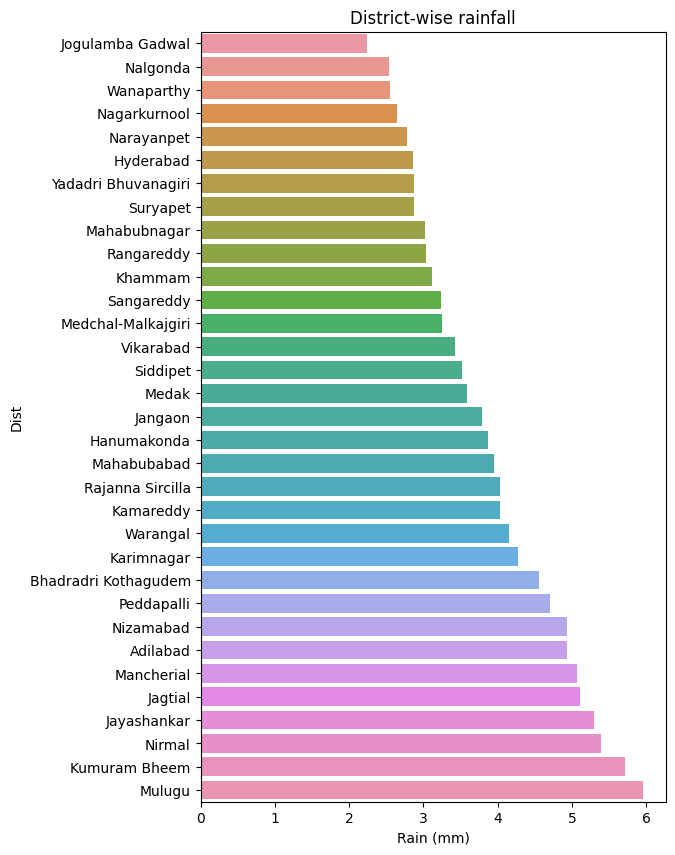

In [23]:
plt.figure(figsize=(6,10))
q=list(df['District'].unique())
p=[]

for i in q:
  x=pd.DataFrame(data=df[df["District"]==i])
  p.append(x['Rain (mm)'].mean())

data={'Dist':q,'value':p}
pdf=pd.DataFrame(data=data)
pdf.sort_values('value',inplace=True)

sns.barplot(y=pdf['Dist'],x=pdf['value'],orientation='horizontal',estimator="mean")
plt.xlabel("Rain (mm)")
plt.title('District-wise rainfall')
#sns.set_xlabel("Rain (mm)")
#sns.set_title('District-wise Rain(mm)')

Text(0.5, 1.0, 'Monthly average Temperature')

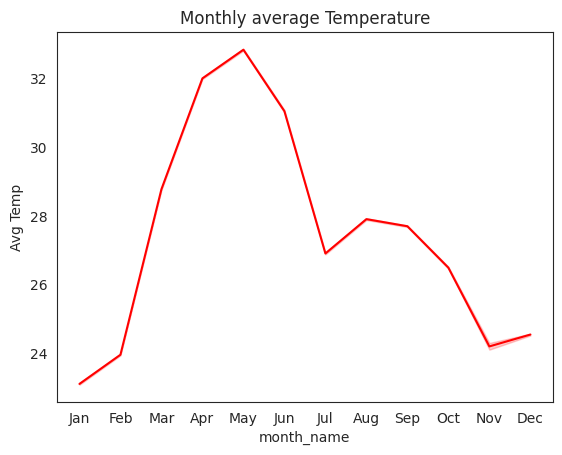

In [24]:
sns.set_style('white')
sns.lineplot(data=df,x='month_name',y='Avg Temp',estimator='mean',color='red')
plt.title('Monthly average Temperature')

Text(0.5, 1.0, 'Avg Temp of the Districts')

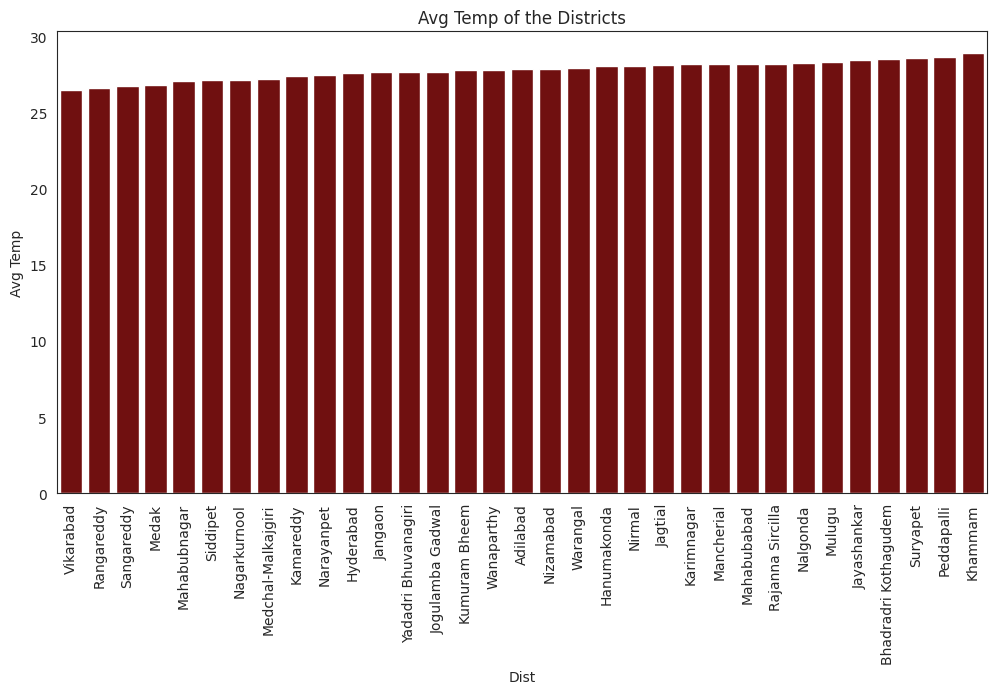

In [25]:
plt.figure(figsize=(12,6))
q=list(df['District'].unique())
p=[]

for i in q:
  x=pd.DataFrame(data=df[df["District"]==i])
  p.append(x['Avg Temp'].mean())

data={'Dist':q,'value':p}
pdf=pd.DataFrame(data=data)
pdf.sort_values('value',inplace=True)

sns.barplot(x=pdf['Dist'],y=pdf['value'],orientation='vertical',estimator="mean",color="maroon")
plt.xticks(rotation=90)
plt.ylabel("Avg Temp")
plt.title("Avg Temp of the Districts")

Text(0.5, 1.0, 'Avg Humidity over the Year')

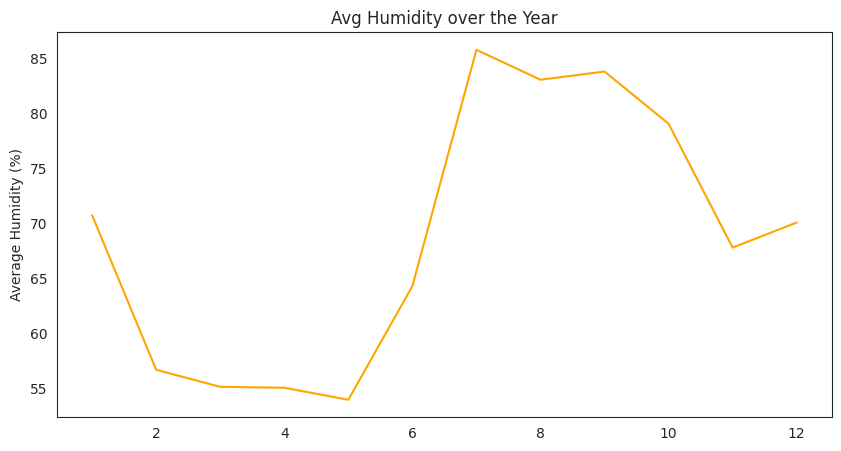

In [26]:
plt.figure(figsize=(10,5))
a=df.groupby(["Month"])["Avg Humidity"].mean()
plt.plot(a,color="orange")
plt.ylabel("Average Humidity (%)")
plt.title("Avg Humidity over the Year")

Text(0.5, 1.0, 'Rainfall over the months')

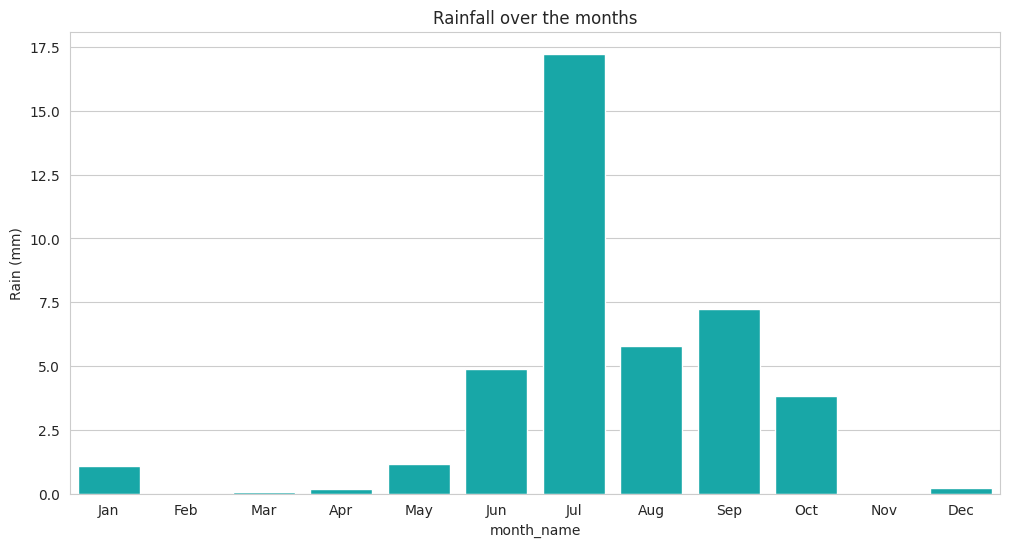

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x=df['month_name'],y=df['Rain (mm)'],estimator="mean",ci=None,color='c')
plt.title("Rainfall over the months")

Based on above graph we can know that, it is helpful for the farmers to grow the crops which needs more water in the months of july, aug, sep and which needs less water in oct-jan.

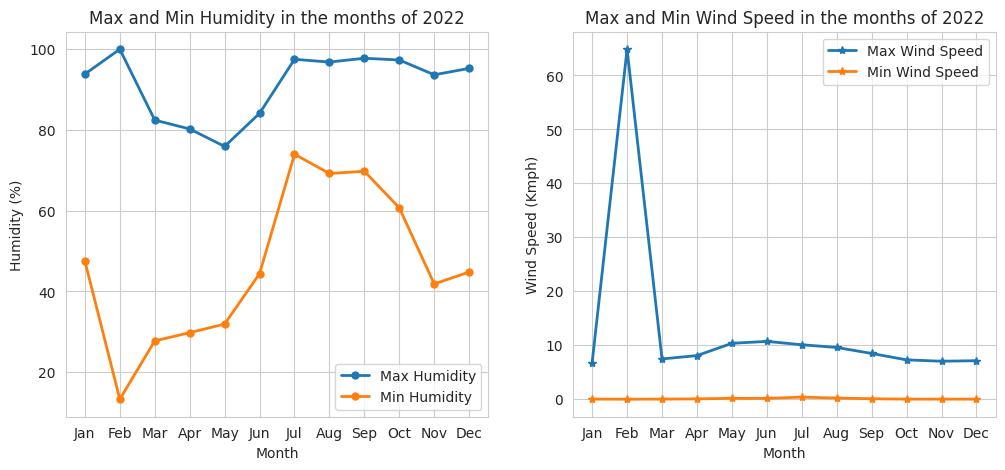

In [28]:
b=list(df.groupby(['Month'])['Min Humidity (%)'].mean())
a=list(df.groupby(['Month'])['Max Humidity (%)'].mean())
d=list(df.groupby(['Month'])['Min Wind Speed (Kmph)'].mean())
c=list(df.groupby(['Month'])['Max Wind Speed (Kmph)'].mean())
y=list(df['month_name'].unique())

fig,axes=plt.subplots(1,2,figsize=(12,5))
axes[0].plot(y,a,y,b,lw=2,linestyle='solid',marker="o",markersize=5)
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Humidity (%)")
axes[0].set_title("Max and Min Humidity in the months of 2022")
axes[0].legend(["Max Humidity","Min Humidity"],loc=4)

axes[1].plot(y,c,y,d,lw=2,linestyle='solid',marker="*",markersize=6)
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Wind Speed (Kmph)")
axes[1].set_title("Max and Min Wind Speed in the months of 2022")
axes[1].legend(["Max Wind Speed","Min Wind Speed"],loc=1)

Text(0.5, 1.0, 'Max and Min Temperature over Months')

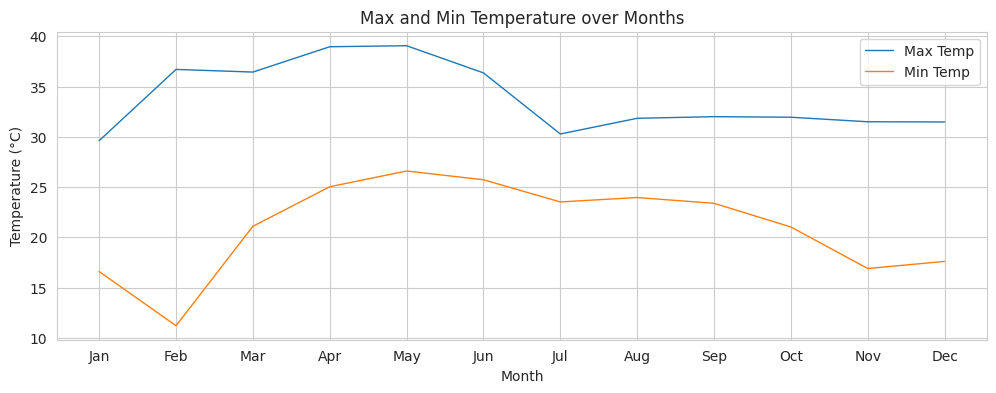

In [29]:
y=list(df.groupby(['Month'])['Max Temp (°C)'].mean())
z=list(df.groupby(['Month'])['Min Temp (°C)'].mean())
a=list(df['month_name'].unique())

fig=plt.figure(figsize=(12,4))
plt.plot(a,y,a,z,lw=1)
plt.grid(True)
plt.legend(["Max Temp","Min Temp"])
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Max and Min Temperature over Months")

Text(0.5, 1.0, 'Relation between Rain and Temp')

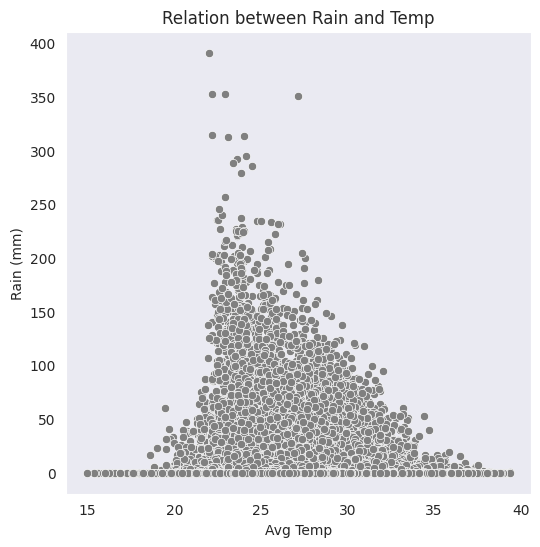

In [30]:
plt.figure(figsize=(6,6))
sns.set_style('dark')
sns.scatterplot(x=df['Avg Temp'],y=df['Rain (mm)'],color="grey")
plt.title("Relation between Rain and Temp")

There is a negative correlation between rain and temp.

Text(0.5, 1.0, 'Relation between Humidity and Temerature')

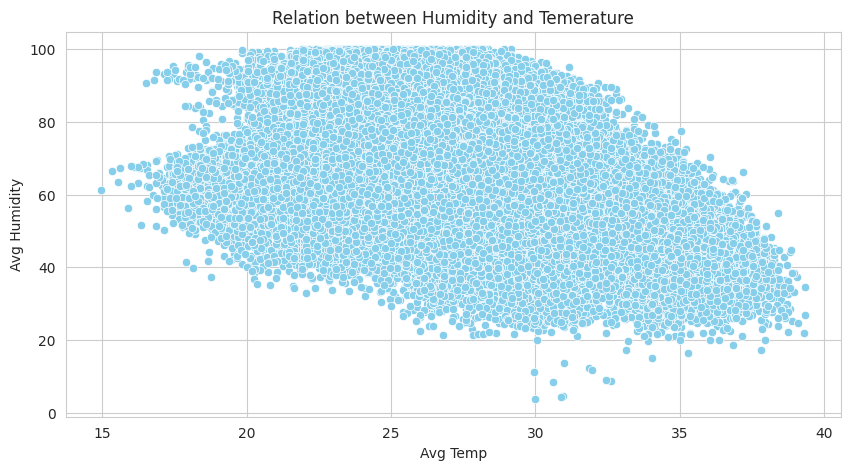

In [31]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.scatterplot(y=df['Avg Humidity'],x=df['Avg Temp'],color='skyblue')
plt.title("Relation between Humidity and Temerature")

As temp is increasing Humidity is decreasing.

Text(0.5, 1.0, 'Rain (mm) vs Avg Humidity')

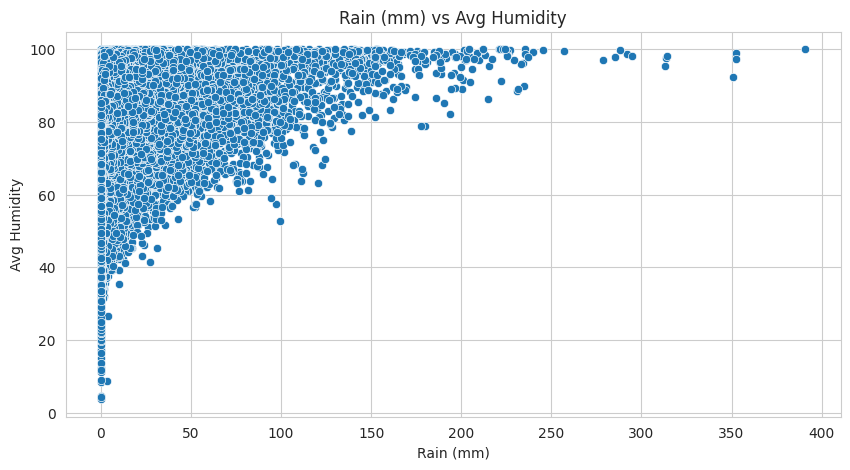

In [32]:
#There is a positive correlation between these two variables
plt.figure(figsize=(10,5))
sns.scatterplot(y=df['Avg Humidity'],x=df['Rain (mm)'])
plt.title("Rain (mm) vs Avg Humidity")

Text(0.5, 1.0, 'avg Wind Speed vs Rain (mm)')

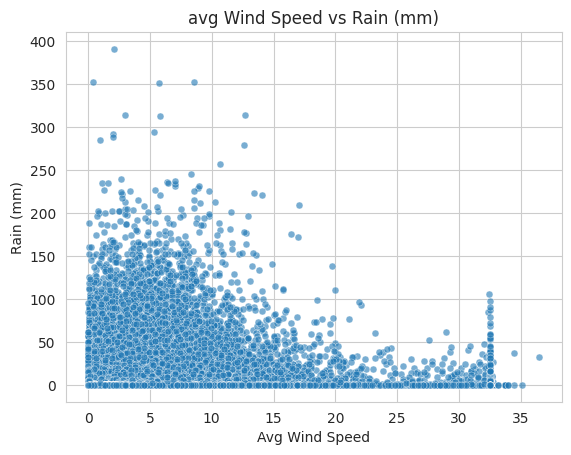

In [33]:
sns.scatterplot(y=df['Rain (mm)'],x=df['Avg Wind Speed'],s=25,alpha=0.6)
plt.title("avg Wind Speed vs Rain (mm)")

Want to know about Basar's weather conditions?

In [34]:
Basardf=df[df["Mandal"]=='Basar']
Basardf.head()

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Avg Temp,Avg Humidity,Avg Wind Speed,Date1,Month,month_name,Day
11005,Nirmal,Basar,01-Jan-22,0.0,15.8,25.6,62.0,97.7,0.0,6.5,20.70,79.85,3.25,2022-01-01,1,Jan,1
11006,Nirmal,Basar,02-Jan-22,0.0,17.0,27.3,45.8,96.0,0.0,7.9,22.15,70.90,3.95,2022-01-02,1,Jan,2
11007,Nirmal,Basar,03-Jan-22,0.0,15.3,28.1,38.7,95.4,0.0,6.0,21.70,67.05,3.00,2022-01-03,1,Jan,3
11008,Nirmal,Basar,04-Jan-22,0.0,14.7,27.7,39.9,96.2,0.0,5.1,21.20,68.05,2.55,2022-01-04,1,Jan,4
11009,Nirmal,Basar,05-Jan-22,0.0,14.1,28.0,38.6,95.8,0.0,8.8,21.05,67.20,4.40,2022-01-05,1,Jan,5


In [35]:
Basardf.describe()

,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Avg Temp,Avg Humidity,Avg Wind Speed,Month,Day
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,5.071131,21.613690,33.764881,45.754464,87.495833,0.022024,12.609821,27.689286,66.625149,6.315923,6.139881,15.776786
std,16.545540,5.004254,4.353954,22.953710,16.025298,0.175491,16.353337,3.877863,17.137573,8.178254,3.327150,8.833832
min,0.000000,6.000000,23.700000,5.200000,47.000000,0.000000,0.000000,17.850000,30.150000,0.000000,1.000000,1.000000
25%,0.000000,19.000000,31.175000,26.275000,83.025000,0.000000,5.400000,25.137500,54.162500,2.700000,3.000000,8.000000
50%,0.000000,22.800000,33.100000,42.300000,95.550000,0.000000,8.500000,27.450000,67.900000,4.250000,6.000000,16.000000
75%,0.000000,24.500000,37.125000,65.275000,98.500000,0.000000,11.675000,30.175000,81.425000,5.837500,9.000000,23.000000
max,149.000000,32.000000,44.800000,98.500000,100.000000,2.000000,67.400000,36.450000,99.200000,33.700000,12.000000,31.000000


Text(0.5, 1.0, 'Relation b/w Rain and Temp (Basar)')

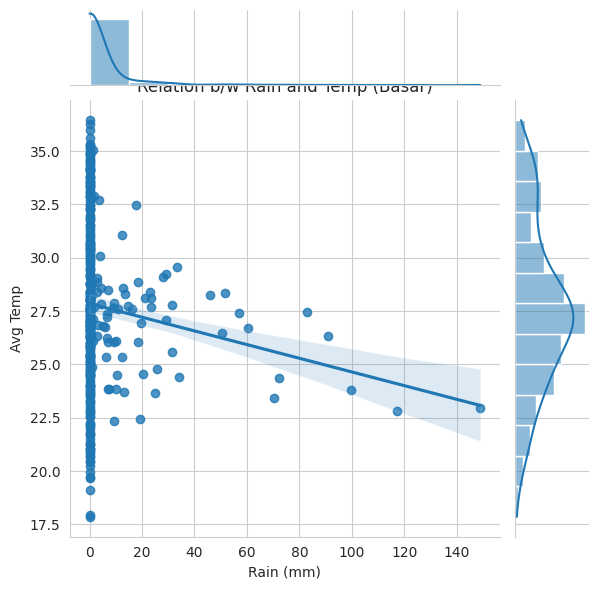

In [36]:
sns.jointplot(x='Rain (mm)',y='Avg Temp',data=Basardf,kind='reg')
plt.title("Relation b/w Rain and Temp (Basar)")

In [37]:
ibpdf=df[df["Mandal"]=='Ibrahimpatnam']
ibpdf.head()

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),Avg Temp,Avg Humidity,Avg Wind Speed,Date1,Month,month_name,Day
2325,Jagtial,Ibrahimpatnam,01-Jan-22,0.0,18.8,30.3,70.6,99.9,0.0,8.3,24.55,85.25,4.15,2022-01-01,1,Jan,1
2326,Jagtial,Ibrahimpatnam,02-Jan-22,0.0,19.6,30.5,57.5,99.9,0.0,5.3,25.05,78.70,2.65,2022-01-02,1,Jan,2
2327,Jagtial,Ibrahimpatnam,03-Jan-22,0.0,18.5,31.3,46.8,99.9,0.0,7.1,24.90,73.35,3.55,2022-01-03,1,Jan,3
2328,Jagtial,Ibrahimpatnam,04-Jan-22,0.0,18.7,30.8,50.2,99.9,0.0,5.3,24.75,75.05,2.65,2022-01-04,1,Jan,4
2329,Jagtial,Ibrahimpatnam,05-Jan-22,0.0,16.5,32.5,40.6,99.9,0.0,6.5,24.50,70.25,3.25,2022-01-05,1,Jan,5


Text(0.5, 1.0, 'avg Temp of Basar and Ibrahimpatnam')

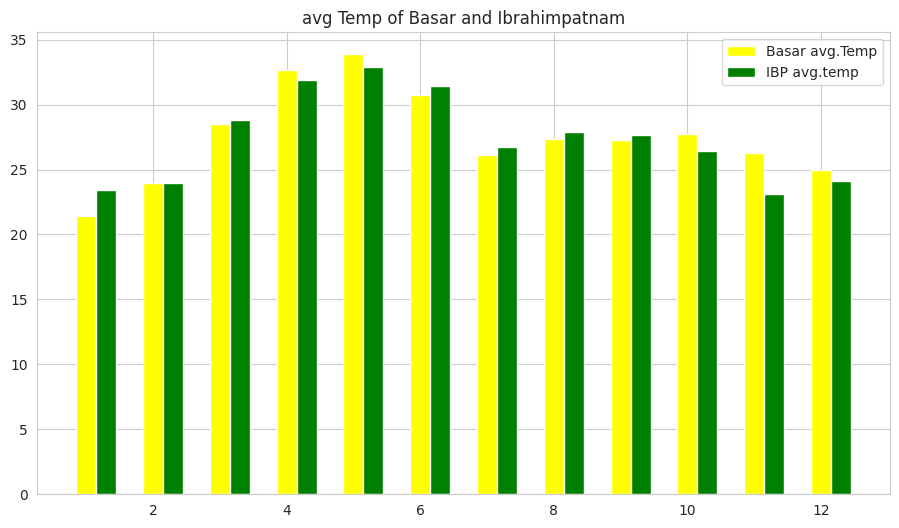

In [38]:
x=Basardf.groupby(['Month'])['Avg Temp'].mean()
y=ibpdf.groupby(['Month'])['Avg Temp'].mean()
a=df['Month'].unique()
b=[i+0.3 for i in a]
plt.figure(figsize=(11,6))
plt.bar(a,x,width=0.3,color='yellow')
plt.bar(b,y,width=0.3,color='green')
plt.legend(['Basar avg.Temp','IBP avg.temp'])
plt.title('avg Temp of Basar and Ibrahimpatnam')

In [40]:
q=list(df['Mandal'].unique())
p=[]

for i in q:
  x=pd.DataFrame(data=df[df["Mandal"]==i])
  p.append(x['Rain (mm)'].mean())

data={'Mdl':q,'rain':p}
raindf=pd.DataFrame(data=data)
raindf.head()

,Mdl,rain
0,Adilabad Rural,5.702360
1,Adilabad Urban,4.063501
2,Bazarhathnoor,5.277679
3,Bela,3.616024
4,Bheempoor,3.894970


In [46]:
inds=np.where(raindf.rain<2)

In [43]:
raindf.iloc[inds]

,Mdl,rain
325,Kondamallapally,1.619643
334,Neredugommu,1.872781
337,Peddavura,1.579290
341,Tirumalagiri_Sagar,1.306548
505,Chinthala Palem,1.770326
507,Garidepalle,1.928994
512,Mattampalle,1.641071
520,Palakeedu,1.303550
528,Chowdapur,1.880119
573,Choutuppal,1.816964


The above mandals have very less rainfall compared to other mandals over the 2022. So it will be helpfull in the future if the government plant more trees in those districts.

In [47]:
inds1=np.where(raindf.rain>6.5)

In [45]:
raindf.iloc[inds1]

,Mdl,rain
31,Karakagudem,7.568639
108,Mutharam_Mahadevpur,6.714201
187,Jainoor,7.807941
189,Kerameri,6.579762
191,Lingapur,6.991098
195,Sirpur_U,6.694048
286,Mangapet,6.716617
290,Venkatapuram,7.464688
369,Pembi,6.739104
389,Navipet,6.961128


The above Mandals of Telangana has more rainfall compared to other mandals over the 2022. So it is good if government takes care of these mandals in order to protect from mosquitoes and other diseases due to having more water storage.